In [40]:
import wave
import numpy as np
from scipy.io import wavfile
from scipy import signal
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft

In [87]:
# 讀取音檔，可讀取 16bits 以上
def _wav2array(nchannels, sampwidth, data):
    """data must be the string containing the bytes from the wav file."""
    num_samples, remainder = divmod(len(data), sampwidth * nchannels)
    if remainder > 0:
        raise ValueError('The length of data is not a multiple of '
                         'sampwidth * num_channels.')
    if sampwidth > 4:
        raise ValueError("sampwidth must not be greater than 4.")

    if sampwidth == 3:
        a = np.empty((num_samples, nchannels, 4), dtype=np.uint8)
        raw_bytes = np.fromstring(data, dtype=np.uint8)
        a[:, :, :sampwidth] = raw_bytes.reshape(-1, nchannels, sampwidth)
        a[:, :, sampwidth:] = (a[:, :, sampwidth - 1:sampwidth] >> 7) * 255
        result = a.view('<i4').reshape(a.shape[:-1])
    else:
        # 8 bit samples are stored as unsigned ints; others as signed ints.
        dt_char = 'u' if sampwidth == 1 else 'i'
        a = np.fromstring(data, dtype='<%s%d' % (dt_char, sampwidth))
        result = a.reshape(-1, nchannels)
    return result

def readwav(file):
    """
    Read a wav file.
    Returns the frame rate, sample width (in bytes) and a numpy array
    containing the data.
    This function does not read compressed wav files.
    """
    wav = wave.open(file)
    rate = wav.getframerate()
    nchannels = wav.getnchannels()
    sampwidth = wav.getsampwidth()
    nframes = wav.getnframes()
    data = wav.readframes(nframes)
    wav.close()
    array = _wav2array(nchannels, sampwidth, data)
    return rate, sampwidth, array

In [88]:
import numpy
def frget(samplingFreq,mySound):
    #Check if wave file is 16bit or 32 bit. 24bit is not supported
    #檢查波形文件是16位還是32位。 不支持 24 位
    mySoundDataType = mySound.dtype

    #We can convert our sound array to floating point values ranging from -1 to 1 as follows
    #我們可以將我們的聲音數組轉換為範圍從 -1 到 1 的浮點值，如下所示
    mySound = mySound / (2.**15)

    #Check sample points and sound channel for duel channel(5060, 2) or  (5060, ) for mono channel
    #檢查雙聲道(5060, 2)或(5060, )單聲道的採樣點和聲道
    mySoundShape = mySound.shape
    samplePoints = float(mySound.shape[0])

    #Get duration of sound file
    #獲取聲音文件的時長
    signalDuration =  mySound.shape[0] / samplingFreq

    #If two channels, then select only one channel
    #如果有兩個通道，則只選擇一個通道
    mySoundOneChannel = mySound[:,0]

    #Plotting the tone
    #繪製基調
    # We can represent sound by plotting the pressure values against time axis.
    #Create an array of sample point in one dimension
    # 我們可以通過根據時間軸繪製壓力值來表示聲音。
    #創建一維樣本點數組
    timeArray = numpy.arange(0, samplePoints, 1)

    #
    timeArray = timeArray / samplingFreq

    #Scale to milliSeconds
    #Scale到毫秒
    timeArray = timeArray * 1000

    #Plot the tone
    #繪製時域
    ########################################################################
    #plt.plot(timeArray, mySoundOneChannel, color='g')
    #plt.xlabel('Time (ms)')
    #plt.ylabel('Amplitude')
    #plt.show()
    ########################################################################


    #Plot frequency content
    #We can get frquency from amplitude and time using FFT , Fast Fourier Transform algorithm
    #繪製頻率內容
    #我們可以使用FFT，快速傅立葉變換算法從幅度和時間中獲得頻率

    #Get length of mySound object array
    #獲取mySound對像數組的長度
    mySoundLength = len(mySound)

    #Take the Fourier transformation on given sample point 
    #對給定的樣本點進行傅立葉變換
    #fftArray = fft(mySound)
    fftArray = fft(mySoundOneChannel)
    
    numUniquePoints = int(numpy.ceil((mySoundLength + 1) / 2.0))
    fftArray = fftArray[0:numUniquePoints]
    
    #FFT contains both magnitude and phase and given in complex numbers in real + imaginary parts (a + ib) format.
    #FFT 包含幅度和相位，並以實部 + 虛部 (a + ib) 格式以復數形式給出。
    
    #By taking absolute value , we get only real part
    #取絕對值，我們只得到實部

    fftArray = abs(fftArray)

    #Scale the fft array by length of sample points so that magnitude does not depend on
    #the length of the signal or on its sampling frequency
    #按樣本點的長度縮放fft數組，使幅度不依賴於信號的長度或其採樣頻率
    
    fftArray = fftArray / float(mySoundLength)

    #FFT has both positive and negative information. Square to get positive only
    #FFT既有正面信息也有負面信息。 方形只獲得正面
    fftArray = fftArray **2

    #Multiply by two (research why?)
    #Odd NFFT excludes Nyquist point
    if mySoundLength % 2 > 0: #we've got odd number of points in fft#我們在fft中有奇數個點
        fftArray[1:len(fftArray)] = fftArray[1:len(fftArray)] * 2

    else: #We've got even number of points in fft#我們在fft中有偶數個點
        fftArray[1:len(fftArray) -1] = fftArray[1:len(fftArray) -1] * 2  

    freqArray = numpy.arange(0, numUniquePoints, 1.0) * (samplingFreq / mySoundLength);
    return freqArray,fftArray

In [142]:
def TD_single(samplerate,data,xfig,yfig,output_name):
    print(f"number of samplerate = {samplerate}")
    print(f"number of channels = {data.shape[1]}")
    length = data.shape[0] / samplerate
    print(f"length = {length}s")

    time = np.linspace(0., length, data.shape[0])
    fig = plt.figure(figsize=(xfig, yfig))

    plt.plot(time, data[:, 0], label="Raw", color='gray')

    plt.xticks(range(int(length)))  # 設定x刻度


    plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    #plt.show()
    
    if output_name is not None:
        #file_path = os.path.abspath(file_path)
        plt.savefig(output_name+"_Wav_TD_single.png",dpi=600)
        print("Have save fig into "+output_name+"_Wav_TD_single.png")

In [143]:
def TD_twice(samplerate,data,samplerate2,data2,xfig,yfig,output_name):
    print(f"number of samplerate = {samplerate}")
    print(f"number of channels = {data.shape[1]}")
    length = data.shape[0] / samplerate
    print(f"length = {length}s")
    time = np.linspace(0., length, data.shape[0])

    
    print(f"number of samplerate = {samplerate2}")
    print(f"number of channels = {data2.shape[1]}")
    length2 = data2.shape[0] / samplerate2
    print(f"length = {length2}s")
    time2 = np.linspace(0., length2, data2.shape[0])

    fig = plt.figure(figsize=(xfig, yfig))
    plt.plot(time, data[:, 0], label="Raw", color='gray')
    plt.plot(time2, data2[:, 0], label="Target", color='brown')
    #plt.plot(time, data[:, 1], label="Right channel")
    plt.xticks(range(int(length)))  # 設定x刻度


    plt.legend()
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    #plt.show()
    if output_name is not None:
        #file_path = os.path.abspath(file_path)
        plt.savefig(output_name+"_Wav_TD_twice.png",dpi=600)
        print("Have save fig into "+output_name+"_Wav_TD_twice.png")

In [144]:
def FD_single(freqArray,fftArray,xfig,yfig,output_name):
    #Plot the frequency
    fig = plt.figure(figsize=(xfig, yfig))
    plt.plot(freqArray/1000, 10 * numpy.log10 (fftArray), color='gray')
    plt.xlabel('Frequency (Khz)')
    plt.ylabel('Power (dB)')
    
    #plt.show()

    if output_name is not None:
        #file_path = os.path.abspath(file_path)
        plt.savefig(output_name+"_Wav_FD_single.png",dpi=600)
        print("Have save fig into "+output_name+"_Wav_FD_single.png")

In [145]:
def FD_twice(freqArray,fftArray,freqArray2,fftArray2,xfig,yfig,output_name):
    #Plot the frequency
    fig = plt.figure(figsize=(xfig, yfig))
    plt.plot(freqArray/1000, 10 * numpy.log10 (fftArray), color='gray', label="Raw")
    plt.plot(freqArray2/1000, 10 * numpy.log10 (fftArray2), color='brown', label="Target")
    
    plt.legend()
    plt.xlabel('Frequency (Khz)')
    plt.ylabel('Power (dB)')
    #plt.show()

    #Get List of element in frequency array
    #print freqArray.dtype.type
    #freqArrayLength = len(freqArray)
    #print ("freqArrayLength =", freqArrayLength)
    #numpy.savetxt("freqData.txt", freqArray, fmt='%6.2f')

    #Print FFtarray information
    #print ("fftArray length =", len(fftArray))
    #numpy.savetxt("fftData.txt", fftArray)
    if output_name is not None:
        #file_path = os.path.abspath(file_path)
        plt.savefig(output_name+"_Wav_FD_twice.png",dpi=600)
        print("Have save fig into "+output_name+"_Wav_FD_twice.png")

In [146]:
def batch_processing(Raw_wav=None,Target_wav=None, output_name="./outputs",TD=True,FD=True,xfig=6,yfig=4):
    if(Target_wav):
        print("------Compare mode-----")
        samplerate_R, samplewidth_R, data_R  = readwav(Raw_wav)
        samplerate_T, samplewidth_T, data_T  = readwav(Target_wav)

        if(TD):
            TD_twice(samplerate_R,data_R,samplerate_T,data_T,xfig,yfig,output_name)
        if(FD):
            freqArray_R,fftArray_R = frget(samplerate_R,data_R)
            freqArray_T,fftArray_T = frget(samplerate_T,data_T)
            FD_twice(freqArray_R,fftArray_R,freqArray_T,fftArray_T,xfig,yfig,output_name)
            
        print("------Compare mode-----")
    else:
        print("------Single mode------")
        samplerate_R, samplewidth_R, data_R  = readwav(Raw_wav)
        if(TD):
            TD_single(samplerate_R,data_R,xfig,yfig,output_name)
        if(FD):
            freqArray_R,fftArray_R = frget(samplerate_R,data_R)
            FD_single(freqArray_R,fftArray_R,xfig,yfig,output_name)
            
        print("------Single mode------")


In [147]:
Raw = "../Test/oBRD.wav"
Target = "../Test/re_audio.wav"

------Compare mode-----
number of samplerate = 44100
number of channels = 1
length = 18.62047619047619s
number of samplerate = 44100
number of channels = 1
length = 18.62047619047619s


<ipython-input-87-fc2ffe4809b5>:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  raw_bytes = np.fromstring(data, dtype=np.uint8)


Have save fig into ./outputs_Wav_TD_twice.png
Have save fig into ./outputs_Wav_FD_twice.png
------Compare mode-----


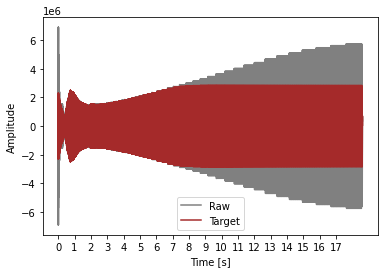

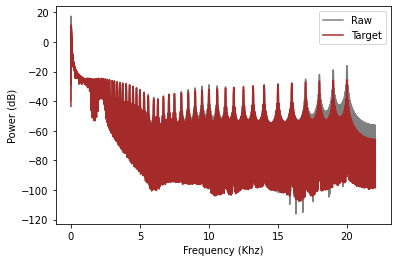

In [149]:
batch_processing(Raw,Target)

In [ ]:
samplerate,samplewidth, data = readwav('./audio.wav')
sig = data/samplerate
print("sampling rate = {} Hz, length = {} samples, channels = {}".format(samplerate, *sig.shape))